#データ読み込み<br>
演習で用いるデータはcsvファイル（comma-separated valuesファイル）で表現されています． Pythonの標準の機能を使って読み込んでも良いのですが，Pythonにはpandasというデータ解析のための便利なライブラリがあります． pandasによって，CSVを含む様々なファイルを簡単に読み込み，さらに読み込んだデータに対して様々な処理を簡単に行うことができます．

なお，今回は文字列の情報を含んでいるためpandasを用いますが，数値情報だけであれば，Pythonにおける数値・行列・線形代数計算ライブラリのNumPyで読み込んで処理するほうが楽であることも多いです（NumPyについては，section0_2_how_to_numpyを参照）． また，scikit-learnの関数には，NumPyの配列を前提とするものやNumPyの配列を返すものも数多くあり、計算も高速になります。
一方でnumpyとして扱う場合は列名やインデックスが失われるため、特徴量の意味が分かりにくくなったり、モデルの解釈をするときに「どの列がどの特徴量か」が分からなくなってしまいます。速度やメモリを極限まで追う場合と特徴量名を追いたい、可視化したい場合でnumpyとpandasを使い分けましょう。

まず，今回使うものをimport（=C言語で言うところのincludeだと思ってください）をしましょう．

In [1]:
import numpy as np
import pandas as pd
# 機械学習のライブラリ．今回は線形回帰LinearRegressionを動かす．
# LinearRegressionはsklearnのlinear_modelモジュールの中にあるので，次のようにインポートする
from sklearn.linear_model import LinearRegression

上のセルを動かしましたか？その際に特にエラーが出なければ，インポートに成功しています． これ以降皆さんはnumpy，pandas，そしてsklearn.linear_modelのLinearRegressionが使えるようになりました！

では，次は訓練データとテストデータを読み込みます． csvファイルは，pandasのread_csvという関数を使って読み込むことができます． ファイルのパスを引数として渡すと，pandas.DataFrameという型で（オブジェクト指向言語なので，「pandas.DataFrameクラスのインスタンスを作成して」とも言える）読み込んだものを返してくれます． 詳細は公式のドキュメント( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html ) を参照してください． では実際に動かしてみます．

このノートブックを動かしているディレクトリにdataディレクトリがあり，その中にtrain.csvとtest.csvが存在していると仮定しています． そうでない場合は適宜書き換えてください．

Goole Colabを用いている場合，Google Driveにdataフォルダを置いて，次のセルのコメントアウトを外して動かしてください（自身のPython環境で動かしている場合は，次のセルは飛ばして良いです）．次のセルを動かした後，以下の手順を踏むことでGoogle Driveのデータを読み込むことができるようになります．

・ 以下のセルを動かすと，URLが出てくるのでそこにアクセスしてください．<br>
・ グーグルアカウントのログインが求められるので，ログインしてください．<br>
・ authorization codeが表示されるので，それを貼り付けてください．<br>
・ 更にその下のセルのread_csvで指定されているパスを適宜書き換えてください．<br>
画面左側のバーで「フォルダ」のタブを選ぶと"drive"というフォルダが出てくると思いますが，そこがGoogle Driveを表しています．そこを見て適宜パスを書き換えてください．

In [2]:
from google.colab import drive
drive.mount('/content/drive') # google driveをマウント（＝Colabから使えるようにする）

Mounted at /content/drive


In [3]:
# 動的型付け言語なので，変数の型の宣言は不要
# Google Colabの場合
d_train = pd.read_csv("/content/drive/My Drive/PBL2025/omni2_selected_2000_2024.csv") # 訓練データを読み込む．TFがGoogle Driveの一番上にdataディレクトリを置いた場合はこのようなパスになった
d_test = pd.read_csv("/content/drive/My Drive/PBL2025/omni2_selected_2025H1_Dst99999.csv") # テストデータを読み込む． TFがGoogle Driveの一番上にdataディレクトリを置いた場合はこのようなパスになった
# Jupyter Notebook の場合
#d_train = pd.read_csv("data/omni2_selected_2000_2024.csv") # 訓練データを読み込む
#d_test = pd.read_csv("data/omni2_selected_2025H1_Dst99999.csv") # テストデータを読み込む

エラーが何も出ていなければ読み込めています．しかし言われるがまま読み込んだだけでどうなっているのかよくわかりませんね．読み込んだデータの内容をprintで確認してみましょう.

In [4]:
print("訓練データ")
print(d_train)
print("\nテストデータ")
print(d_test)

訓練データ
        Year  Month  Day_of_month  Hour[h]  B_mag[nT]  Bx_GSE[nT]  By_GSM[nT]  \
0       2000      1             1        0        7.5        -5.6         2.2   
1       2000      1             1        1        7.8        -4.9         4.7   
2       2000      1             1        2        7.6        -2.7         5.3   
3       2000      1             1        3        7.4        -3.9         3.3   
4       2000      1             1        4        7.0        -3.5         1.9   
...      ...    ...           ...      ...        ...         ...         ...   
219163  2024     12            31       19       23.8       -13.8        18.4   
219164  2024     12            31       20       23.3       -10.5        18.0   
219165  2024     12            31       21       20.6        -8.4        18.1   
219166  2024     12            31       22       19.3        -8.3        16.2   
219167  2024     12            31       23       15.6        -6.4        13.4   

        Bz_GSM[nT]  T

csvファイルの中身が出てきました！すばらしいですね． 詳細はスライドを確認してほしいですが，この行列は，各行がある時刻のデータに対応しています． 各列はの太陽活動や磁気圏に関する何らかの情報を表していて，各列がどのような情報なのかはヘッダーに書かれています． たとえば，1-3列目は"Year""Month""Day_of_month"と書かれているので，これらは日付の情報ですね． 訓練データの最後の列は"DsT[nT]"と書かれており，これはまさしく目標値（出力・教師情報）です．

テストデータにDsT[nT]の列はありますが、すべて99999となっていてダミーであることがわかります.この列の値を予測して，その予測の正確さで皆さんに競っていただくのがこのコンペティションです．

特徴量ベクトルを作るために各列や行を取り出してみましょう．

列を取り出すのは非常に簡単で，他のプログラミング言語で配列の要素にアクセスするのと同じようにブラケット（角括弧）を用います．具体的には，

d_train[列の名前]

とすることで取り出せます．また，複数の列を取り出すことは，

d_train[列の名前のリスト]

でできます（"取り出す"と言っていますが，元のDataFrameから消えるわけではありません）．以下のセルで実際にやってみましょう．

In [5]:
#指定した列だけ取り出す
xlist = [ 'Year', 'Month', 'Day_of_month','Hour[h]', 'B_mag[nT]','Bx_GSE[nT]', 'By_GSM[nT]','Bz_GSM[nT]', 'T_proton[K]', 'N_proton[cm^-3]', 'V_sw[km/s]',
         'Flow_pressure[nPa]', 'E_field[mV/m]', 'Sunspot_num', 'f10.7[sfu]', 'Lyman_alpha[W/m^2]']
         #colabの場合はReturnで改行できる
ylist = ['Dst[nT]']
x_train = d_train[xlist]
y_train = d_train[ylist]
x_test = d_test[xlist]
y_test = d_test[ylist]
#訓練データのみプリント
print(x_train)
print(d_train)

        Year  Month  Day_of_month  Hour[h]  B_mag[nT]  Bx_GSE[nT]  By_GSM[nT]  \
0       2000      1             1        0        7.5        -5.6         2.2   
1       2000      1             1        1        7.8        -4.9         4.7   
2       2000      1             1        2        7.6        -2.7         5.3   
3       2000      1             1        3        7.4        -3.9         3.3   
4       2000      1             1        4        7.0        -3.5         1.9   
...      ...    ...           ...      ...        ...         ...         ...   
219163  2024     12            31       19       23.8       -13.8        18.4   
219164  2024     12            31       20       23.3       -10.5        18.0   
219165  2024     12            31       21       20.6        -8.4        18.1   
219166  2024     12            31       22       19.3        -8.3        16.2   
219167  2024     12            31       23       15.6        -6.4        13.4   

        Bz_GSM[nT]  T_proto

# 線形回帰を動かす

ここまでおつかれさまでした。  
ついに機械学習アルゴリズムを動かすときが来ました。  

scikit-learn には教師あり学習のモデル・アルゴリズムが多数実装されています：  
👉 [Supervised Learning — scikit-learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

すさまじい量ですね！色々ありますが、まずは最も単純な手法の一つである **線形回帰（重回帰） = `LinearRegression`** を動かしてみましょう。

---

## 線形モデルとは？

線形モデルは次のように表されます：

$$
y = w_1 x_1 + w_2 x_2 + \cdots + w_d x_d + b
$$

ここで、

- $x = (x_1, x_2, \dots, x_d)$ ：特徴ベクトル  
- $d$ ：特徴量の次元数（例では入力の列数）  
- $w_1, w_2, \dots, w_d$ ：学習されるパラメータ（重み）  
- $b$ ：切片

「線形モデルを学習する」とは、訓練データから **パラメータ \(w, b\) をうまく推定する** ことを意味します。

特に、平均二乗誤差（MSE）

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

を最小化することで学習する場合、この手法は **線形回帰** と呼ばれます。

---

## 線形モデルの多様性

- 「線形回帰」は二乗誤差を最小化する方法。  
- 他の損失関数や制約を課すと、別のアルゴリズム（例：リッジ回帰、ラッソ回帰）になります。  
- sklearn の `Linear Models` には [17 種類以上の手法]( https://scikit-learn.org/stable/supervised_learning.html#supervised-learning )が実装されていますが、**基本的なモデルの形は同じ**で、学習アルゴリズムや制約が異なるだけです。  

---

## sklearn での基本手順

scikit-learn で学習を行う流れはシンプルです：

1. **モデルのインスタンスを作成**  
   例: `model = LinearRegression()`

2. **fit メソッドで学習**  
   訓練データ \(X\)（行列）と 目標値 \(y\)（ベクトル）を渡す。  
   例: `model.fit(X_train, y_train)`

3. **predict メソッドで予測**  
   学習済みモデルを使って新しい入力に対する出力を予測する。  
   例: `y_pred = model.predict(X_test)`

scikit-learn では「学習アルゴリズムを選ぶ」という操作は、**インスタンスを作る時点でクラスを選択する**ことで行います。

それでは、実際に上記の手順で学習してみましょう！


In [6]:
# 手順1：LinearRegressionのインスタンスの作成
lr = LinearRegression()
# 手順2：上で作ったオブジェクトの学習
lr.fit(x_train, y_train)
# 手順3：テストデータに対する予測
y_pred_test = lr.predict(x_test)

これで学習とテストデータに対する予測まで終わりました!たった3行です．<br>
すごいですね．予測結果をプリントしてみましょう．

In [7]:
print(y_pred_test)

[[-34.01097713]
 [-34.04730727]
 [-27.48632714]
 ...
 [ -9.85721477]
 [ -9.36378781]
 [-10.46630104]]


予測結果がどのように変化しているかを可視化(プロット)してみましょう。
x軸、y軸の配列をx,yとすると

plt.plot(y) #この場合x軸のラベルは要素の順番になる<br>
plt.plot(x, y),<br>
でプロットすることができます。

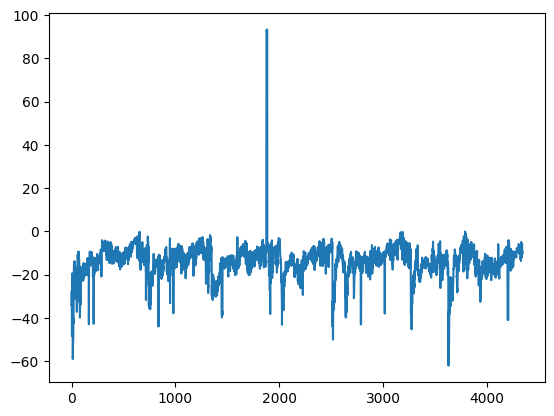

In [8]:
import matplotlib.pyplot as plt
plt.plot(y_pred_test)
plt.show()

#予測結果の提出<br>
予測ができたので，この結果をcsvファイルで提出することを考えます(今回のビッグデータ大学のプラットフォームではcsvファイルのみ提出を受け付けている)．予測結果をファイルに出力しなければなりません．ファイル出力ときくと面倒そうだと思うかもしれませんが，NumPyを用いれば以下のように簡単にできます．

In [9]:
np.savetxt('/content/drive/My Drive/PBL2025/y_pred_lr.csv', y_pred_test,delimiter=',')
#ファイル名と保存したいnumpy配列、区切り文字の順に入力
#delimiter:区切り文字を指定します。CSVの場合は`,`を指定します。

y_pred_lr.csvというファイルが生成されました（Google Colabの場合は，画面左側のタブが「ファイル」のであるとき，「ファイル」という文字の下に3つアイコンがありますが，その真ん中の「更新」アイコンを押すと出てくるはずです）．これをビッグデータ大学に提出してみてください（Google Colabの場合はまず生成されたy_pred_lr.csvをダウンロードしてください）．